In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns
from scipy.integrate import cumtrapz

dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme('talk')
sns.set_style("whitegrid")
sns.set(font_scale=1.0)

(sec-z-transform)=
# Z-Transform

One important mathematical concept for understanding and designing filters is the *Z-transform*.
[Linear time-variant filters (LTI)](def-linear-time-invariant) in the form of infinite (IIR) and finite impulse response (FIR) filters described by difference equations play an important role in signal processing, i.e., sound design, and these filters can be analyzed using the *Z-transform*.

The *Z-transform* converts a discrete-time signal, which is a sequence of real or complex numbers, into a complex frequency-domain ($z$-domain or $z$-plane) representation.
It can be considered as a discrete-time equivalent of the Laplace transform.
The *Z-transform* is a generalization of the *discrete-time Fourier transform (DTFT)* (not to be confused with the discrete Fourier transform), see [Difference between DFT and DTFT](sec-dft-vs-dtft).

````{admonition} (Unilateral) Z-Transform
:name: def-fourier-transform-exp
:class: definition

Let $x[n]$ be a discrete-time signal, then the (unilateral) *Z-transform* of $x[n]$ is the formal power series

$$X(z) = \mathcal{Z}\{x[n]\} = \sum\limits_{n=0}^\infty x[n] z^{-n},$$

where $n \in \mathbb{N}_0$ and $z \in \mathbb{C}$ is a [complex number](sec-complex-numbers).

````

$X(z)$ is a complex-valued function of complex-valued $z$.
Furthermore, $X(z)$ is defined on the $z$-plane while the DTFT is defined only on the unit circle, i.e, for $|z| = 1$, that is, $z = e^{i \omega}$.
Remeber, as $-\pi < \omega < \pi$, $z = e^{i \omega}$ goes once around the unit circle.

## Region of Convergence

The region of convergence is the set of $z$ for which the Z-transform of a signal $x[n]$ converges.
If it does not converge, the Z-transform of the signal does not exist.
For example, let us look at a delayed impulse $x[n] = \delta[n-n_0]$ with $n \geq n_0$.
Here $\delta$ is the [Kronecker $\delta$-function](def-kronecker-delta).
We get

$$\mathcal{Z}\{\delta[n-n_0]\} = \sum\limits_{n=0}^\infty \delta[n-n_0] z^{-n} = z^{-n_0}$$

which does not converge for $z = 0$.

Let us look at another example, i.e., an exponential decay 

$$x[n] = \alpha^n \cdot u[n] = \alpha^n \cdot 1 = \alpha^n.$$

In this case, we get 

\begin{equation}
\begin{split}
X(z) &= \sum\limits_{n = 0}^\infty x[n] z^{-n}
= \sum\limits_{n = 0}^\infty \alpha^n z^{-n}\\
&= \sum\limits_{n = 0}^\infty (\alpha z^{-1})^n.
\end{split}
\end{equation}

Since this is a *geometric series*, this gives us

$$\frac{1}{1-\alpha z^{-1}},$$

if $|\alpha z^{-1}| < 1$, otherwise $X(z)$ does not converge.

In general, the *region of convergence ROC* is either the region 

1. inside a circle ($|z| < r_L$), 
2. outside a circle ($|z| > r_R$) or 
3. a ring ($r_R < |z| < r_L$).

Secondly, the ROC can not contain any *poles*.
The ROC includes $|z| = 1$ if and only if the *discrete-time Fourier transform (DTFT)* exists.
Furthermore, if $x[n]$ is a finite duration signal (which is the case in digital audio processing), then the ROC contains all $z$ except possibly $z=0$ and $z = \infty$.

## Poles and Zeros

Most useful and important Z-transforms are those who give us rational functions

$$X(z) = \frac{P(z)}{Q(z)},$$

with $P(z), Q(z)$ to be polynomials in $z$.
The *zeros* are values of $z$ for which $X(z) = 0$ and the *poles* are values of $z$ for which $X(z) = \infty$.
The roots of $P(z)$ are the *zeros* and the roots of $Q(z)$ are the *poles*.
($X(z)$ may also have poles/zeros at $z = \infty$, if the order of the two polynomials differ.)

Let us look at the example above, i.e.,

$$\mathcal{Z}\{\alpha^n u[n]\} = X(z) = \frac{z}{z-\alpha}, \quad |z| > |\alpha|.$$

In this case there is a *pole* at $z = \alpha$ and a *zero* at $z = 0$.
The following plot shows *zeros* in blue and *poles* in orange.
The *region of convergence (ROC)* (in blue) is outside of the (red) circle of radius $\alpha$.

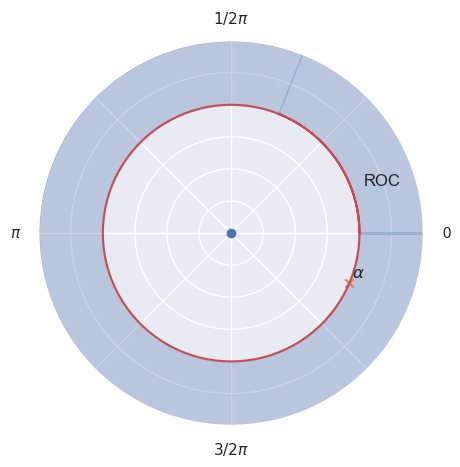

In [2]:
r = np.arange(0, 1.2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.fill_between(2*np.pi*r, 1, np.ones(len(r))*1.5, color='b', alpha = 0.3)
ax.plot(2*np.pi*r, np.ones(len(r)), color='r')

ax.scatter([0], [0], marker='o')
ax.scatter([2*np.pi-0.4], [1], marker='x')


ax.set_rmax(1.5)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5])  # Less radial ticks
ax.set_yticklabels([r'', '', '', '', r'', '', ''])  # Less radial ticks
ax.text(-0.35,1,r'$\alpha$')
ax.text(0.35,1.1,r'ROC')
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True);

Let us look at another example:

$$\mathcal{Z}\left\{ \left( \frac{1}{4} \right) u[n] + \left( \frac{-1}{2}\right)^n u[n]\right\} = X(z) = \frac{z}{z-1/4} + \frac{z}{z + 1/2}, \quad |z| > 1/2$$

Using some algebra, we get

$$X(z) = \frac{z^2 + 1/2 z + z^2 - 1/4 z}{(z-1/4)(z+1/2)} = \frac{2z(z+1/8)}{(z-1/4)(z+1/2)}, \quad |z| > 1/2$$

All *zeros* ($z = 0$, $z = -1/8$) and *poles* ($z = 1/4$, $z = -1/2$) are on the real-axis.

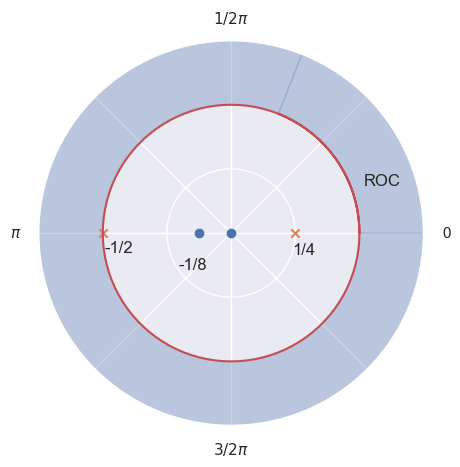

In [3]:
r = np.arange(0, 1.2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.fill_between(2*np.pi*r, 1/2, np.ones(len(r)), color='b', alpha = 0.3)
ax.plot(2*np.pi*r, np.ones(len(r))*0.5, color='r')

ax.scatter([0,np.pi], [0,1/8], marker='o')
ax.scatter([0,np.pi], [1/4,1/2], marker='x')

ax.set_rmax(0.75)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks(np.array([0, 0.25, 0.5, 0.75]))  # Less radial ticks
ax.set_yticklabels([r'', '', '', ''])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.text(np.pi+0.6,1/8*2,r'-1/8')
ax.text(np.pi+0.15,1/2,r'-1/2')
ax.text(-0.15*2.2,1/4,r'1/4')
ax.text(0.35,0.55,r'ROC')
ax.grid(True);

Let us look at another example were 

$$
x[n] = \begin{cases}
    \alpha^n, & \text{ if } 0 \leq n \leq N-1\\
    0, & \text{ otherwise}. 
\end{cases} 
$$

Then,

$$X(z) = \sum\limits_{n=0}^{N-1} (\alpha z^{-1})^n.$$

This is a *geometric series* thus

$$X(z) = \frac{1 - (\alpha z^{-1})^N}{1 - \alpha z ^{-1}} = \frac{z^N- \alpha^N}{z^{N-1}(z-\alpha)}.$$

This geometric series converges for $|\alpha| < \infty$ and $z \neq 0$.
Therefore, the *ROC* is the entire $z$-plane, except $z = 0$.
Our single *pole* is at $z = 0$ since $z = \alpha$ cancels out with our *zero* $z_0 = \alpha$.
Remeber that when we multiply a [complex number](sec-complex-numbers) by another complex number, the result is another complex number that is a rotated and scaled version of the first one.
The equation $z^N = \alpha^N$ should have $N$ solutions.
[De Moivre's theorem](theorem-de-moivre) states that for $z = r \cdot e^{i \phi}$

$$z^N = r^N \cdot \underbrace{e^{i \cdot n \cdot \phi}}_{\text{rotation}}.$$

If we set $r = \alpha$ we get

$$z^N = r^N \cdot e^{i \cdot N \cdot \phi} = \alpha^N \cdot e^{i \cdot N \cdot \phi} = \alpha^N.$$

Note that $|e^{i \cdot N \cdot \phi}| = 1$.
So we search angles $\phi_k$ such that rotating $\alpha^N$ $n$-times with angle $\phi_k$ gives us $\alpha^N$.
If we rotate by 360 degrees, i.e. $2\pi$ we clearly land on $\alpha^N$!
Therefore,

$$\phi_k = \frac{2\pi}{N} \cdot k, \quad k = 1, 2, 3, \ldots, N-1.$$

Thus our *zeros* are

$$z_k = \alpha \cdot e^{i \frac{2\pi}{N} k}, \quad k = 1, 2, 3, \ldots, N-1.$$

The following plot shows *poles* and *zeros* for some $\alpha \in \mathbb{R}^+$.

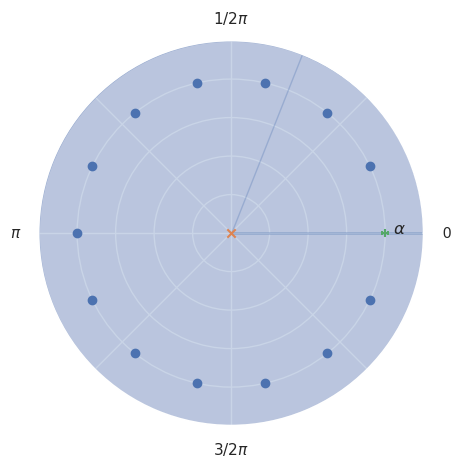

In [4]:
r = np.arange(0, 1.2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.fill_between(2*np.pi*r, 0, np.ones(len(r))*1.25, color='b', alpha = 0.3)

ax.scatter(np.linspace(0, 2*np.pi, 15)[1:-1:], np.ones(15)[1:-1:], marker='o')

ax.scatter([0], [0], marker='x')

ax.scatter([0], [1.0], marker='+')

ax.set_rmax(1.25)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks(np.array([0, 0.25, 0.5, 0.75, 1.0, 1.25]))  # Less radial ticks
ax.set_yticklabels([r'', '', '', '', '', ''])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.text(0,1.05,r'$\alpha$')
ax.grid(True);

In general, if $X(z) = \frac{P(z)}{Q(z)}$ and the order of $P(z)$ is $M$ while the order of $Q(z)$ is $N$ then:

1. $N > M \Rightarrow N-M$ zeros at $z = \infty$
2. $M > N \Rightarrow M-N$ poles at $z = \infty$.

## Power Series Expansion

To find the solution to the Z-transform one might try the *power series expansion* since the Z-transform

$$X(z) = \sum\limits_{n=0}^\infty x[n] z^{-n}$$

is itself a power series.
Therefore, what we have to do is, to identify $x[n]$ as coefficient of $z^{-n}$.
For example, given

$$X(z) = 1 + 3z^{-1} - 4z^{-4}$$

we can write this like

$$X(z) = x[0] z^0 + x[1] z^{-1} - x[4] z^{-4},$$

thus

$$x[n] = \delta[n] + 3 \delta[n-1] - 4 \delta[n-4]$$

where $\delta$ is the [Kronecker $\delta$-function](def-kronecker-delta).

We can also invert rational $X(z)$ with *long division*.
Let us assume

$$X(z) = \frac{1-z^{-1}}{1-1/2 z^{-1}}$$

is given.
For the ROC $|z| > 1/2$ has to hold.

Now we can just compute $(1-z^{-1}) / (1-1/2 z^{-1})$ which gives us

$$1 - 1/2 z^{-1} - 1/4 z^{-2} - 1/8 z^{-3} - 1/16 z ^{-4} - \ldots$$

thus

$$x[n] = 2\delta[0] -\left( \frac{1}{2} \right)^n u[n].$$

## Partial Fraction Expansion

Given a rational function in the Z-domain, which typically represents a system's transfer function or a signal's Z-transform, the goal is to express it as a sum of simpler fractions. The process involves the following steps:

1. Factor the denominator: Write the denominator of the Z-domain function as a product of its factors. If the factors are not real, they will appear as conjugate pairs.
2. Decompose the function: Express the original function as a sum of simpler fractions, where each fraction has one of the factors from the denominator as its own denominator. The numerators of these simpler fractions are constants or polynomials (typically constants in Z-transform applications) to be determined.
3. Find the constants: Use algebraic techniques, such as equating coefficients or substituting specific values of $z$, to solve for the constants (or coefficients in the numerators) in the simpler fractions.
4. Inverse Z-Transform: Apply the inverse Z-Transform to each simpler fraction separately. Since the inverse Z-Transform of many basic fractions is well-known, this step is greatly simplified by the partial fraction expansion.

The case of first-oder terms is the simplest and most fundamental:

$$H(z) = \frac{B(z)}{A(z)} = \sum\limits_{k=1}^N \frac{r_k}{1- p_k z^{-1}},$$

where 

$$B(z) = b_0 + b_1 z^{-1} + b_2z^{-2} + \ldots + b_m z^{-M}$$

and 

$$A(z) = 1 + a_1 z^{-1} + a_2 z^{-2} + \ldots + a_N z^{-N}$$

and $M < N$. $p_k$ are the poles of the [transfer function](sec-trensfer-function), and each numerator $r_k$ is called *residue* of pole $p_k$.
Both the poles and their residues may be complex. The poles may be found by factoring the polynomial $A(z)$ into first-order terms.
The residue $r_k$ corresponding to pole $p_k$ may be found analytically as

$$r_k = (1- p_k z^{-1}) H(z)|_{z = p_k}$$

when the poles $p_k$ are distinct.
Thus, it is the "residue" left over after multiplying $H(z)$ by the pole term $(1- p_k z^{-1})$ and letting $z$ approach $p_k$.
In a partial fraction expansion, the $k^{\text{th}}$ residue $r_k$ can be thought of as simply the *coefficient* of the $k^{\text{th}}$ one-pole term $r_k/(1-p_k z^{-1})$ in the PFE.

### Example

Consider the two-pole filter

$$H(z) = \frac{1}{(1-z^{-1}) (1- 0.5 z^{-1})}$$

The poles are $p_1 = 1$ and $p_2 = 0.5$. The corresponding residues are then

$$r_1 = (1-z^{-1}) H(z)|_{z=1} = \frac{1-z^{-1}}{(1-z^{-1}) (1-0.5 z^{-1})}\bigg|_{z=1} = \frac{1}{1-0.5 z^{-1}}\bigg|_{z=1} = 2$$

and 

$$r_2 = (1-0.5z^{-1}) H(z)|_{z=0.5} = \frac{1-0.5z^{-1}}{(1-z^{-1}) (1-0.5 z^{-1})}\bigg|_{z=0.5} = \frac{1}{1-z^{-1}}\bigg|_{z=0.5} = -1.$$

Therefore, we can conlcude that 

$$H(z) = \frac{2}{^-z^{-1}} - \frac{1}{1-0.5z^{}-1}.$$

### Complex Example

Consider the filter defined by 

$$H(z) = \frac{a}{1+z^{-2}}, \quad a \in \mathbb{C}.$$

The poles are $p_1 = i$ and $p_2 = -i$ since $i^{-2} = (-i)^{-2} = i^{2} = 1$.
Thus we can rewrite $H(z)$ in factored form

$$H(z) = \frac{a}{(1-i z^{-1}) (1+i z^{-1})}.$$

We can use the same equation to get the residues:

$$r_1 = (1-iz^{-1}) H(z)|_{z=i} = \frac{a}{1+i z^{-1}}\bigg|_{z=i} = \frac{a}{2},$$

and

$$r_2 =  (1+iz^{-1}) H(z)|_{z=-i} = \frac{a}{1-i z^{-1}}\bigg|_{z=-i} = \frac{a}{2}$$

Therefore we arrive at

$$H(z) = \frac{a/2}{1-i z^{-1}} + \frac{a/2}{1+iz^{-1}}.$$

## Properties of the Z-Transform

TODO

## LTI Analysis

The general form for a difference equation is given by (and representing a linear time-invariant filter)

\begin{equation}
\sum\limits_{k=0}^N a_k y[n-k] = \sum\limits_{k=0}^M b_k x[n-k], \quad a_0 \neq 0
\end{equation}

(sec-trensfer-function)=
### Transfer Function of LTI Filters

If we take the Z-transform of both sides we get:

\begin{equation*}
\sum\limits_{k=0}^N a_k z^{-k}Y(z) = \sum\limits_{k=0}^M b_k z^{-k} X(z)
\end{equation*}

and by solving for $Y(z)$ we get

\begin{equation*}
Y(z) = \underbrace{\frac{\sum\limits_{k=0}^M b_k z^{-k}}{\sum\limits_{k=0}^N a_k z^{-k}}}_{H(z)} X(z) = H(z) X(z)
\end{equation*}

where $H(z)$ is the *transfer function*.

```{admonition} Transfer Function of LTI Filters
:name: theorem-transfer-function
:class: theorem

The *transfer function* $H : \mathbb{C} \rightarrow \mathbb{C}$ of a *linear filter* 

\begin{equation}
\sum\limits_{k=0}^N a_k y[n-k] = \sum\limits_{k=0}^M b_k x[n-k], \quad a_0 \neq 0
\end{equation}

is defined by

\begin{equation}
H(z) = \frac{\sum\limits_{k=0}^M b_k z^{-k}}{\sum\limits_{k=0}^N a_k z^{-k}},
\end{equation}

```

If $b_0 \neq 0$ then

\begin{equation*}
H(z) = \frac{b_0}{a_0} \frac{\prod\limits_{k=1}^M (1 - c_k z^{-1})}{\prod\limits_{k=1}^N (1 - d_k z^{-1})}
\end{equation*}

where $c_k$ for $k = 1, 2, \ldots M$ are zeros and $d_k$, for $k = 1, 2, \ldots N$ are poles.

```{admonition} Transfer Funktio and Impulse Response
:name: theorem-transfer-function-impulse-response
:class: theorem

The *transfer function* $H : \mathbb{C} \rightarrow \mathbb{C}$ of a *linear filter* is the Z-transform of the impulse response of the filter, i.e.,

\begin{equation}
H(z) = \mathcal{Z}\{h[n]\}
\end{equation}
```

(sec-simple-filter-example)=
### Example 1: Filter Equation to Transfer Function

Let use start with a very *simple filter*.
I will re-use this example in section [Analysis of a Simple Filter](sec-analysis-simple-filter).

\begin{equation*}
y[n] = x[n] + x[n-1], \quad n = 0, 1, 2, \ldots
\end{equation*}

We have $b_0 = b_1 = a_0 = 1$.
Therfore the *transfer function* is determined by

$$H(z) = \frac{b_0 + b_1 z^{-1}}{a_0} = \frac{1 + z^{-1}}{1} = 1 + z^{-1}$$

Therefore, there is a zero at $z = -1$.
The [frequency response](def-frequency-response) of the filter is given by

$$H(e^{i\omega}) = 1 + e^{-i\omega}.$$

The following plot illustrates the behavior of $H$.
Each point on the unit circle represents a specific frequency between $-f_s/2$ and $f_s/2$.
The gain in amplitude for such a point (frequency) is the length of the line segment of that point to the zero!
I draw one such line in blue and some of the points.
Imagine the grey point connected to the cross going around on the unit circle.

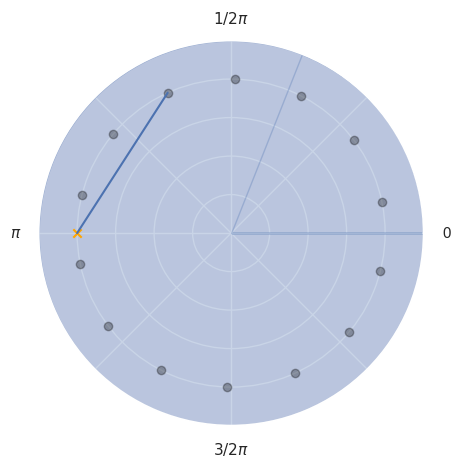

In [5]:
r = np.arange(0, 1.2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.fill_between(2*np.pi*r, 0, np.ones(len(r))*1.25, color='b', alpha = 0.3)

ax.scatter(np.linspace(0.2, 2*np.pi+0.2, 15)[:-1], np.ones(15)[:-1], marker='o', c='black', alpha=0.3)

ax.scatter([np.pi], [1], marker='x', c='orange')

x1, y1 = [np.pi, np.linspace(0.2, 2*np.pi+0.2, 15)[4]], [1, 1]
ax.plot(x1, y1)

ax.set_rmax(1.25)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks(np.array([0, 0.25, 0.5, 0.75, 1.0, 1.25]))
ax.set_yticklabels([r'', '', '', '', '', ''])
ax.set_rlabel_position(-22.5)
ax.grid(True);

With only one zero, the effect of the filter kicks only in for high frequencies, i.e. points close to the zero.

### Example 2: Transfer Function to Filter Equation

Let 

$$H(z) = \frac{(z+1)^2}{(z-1/2)(z+1/4)} = \frac{z^2(1 + z^{-1})^2}{z^2(1-1/2 z^{-1}) (1+1/4 z^{-1})} = \frac{1 + 2 z^{-1} + z^{-2}}{ 1 - 1/4 z^{-1} - 1/8 z^{-2}}$$

Then $b_0 = 1$, $b_1 = 2$, $b_2 = 1$ and $a_0 = 1$, $a_1 = -1/4$, $a_2 = -1/8$ and we get the following equation:

$$y[n] - 1/4 \cdot y[n-1] - 1/8 \cdot y[n-2] = x[n] + 2 \cdot x[n-1] + x[n-2]$$

Thus the *filter* is defined by

$$y[n] = x[n] + 2 \cdot x[n-1] + x[n-2] - 1/4 \cdot y[n-1] - 1/8 \cdot y[n-2].$$

### Stability and Causality

TODO

### Inverse System

TODO

### Minimum Phase and All Pass Filters

TODO

### Frequency Response and Poles and Zeros

TODO

### Impulse Response and Poles and Zeros

TODO